In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
column=["Date","Food.Price.Index","Meat","Dairy","Cereals","Oils","Sugar"]
df_food = pd.read_csv("FAOFP1990_2022.csv",sep=" ")
df_food.head(5)

,Date,Food.Price.Index,Meat,Dairy,Cereals,Oils,Sugar
1,01/01/1990,64.1,73.4,53.5,64.1,44.59,87.9
2,01/02/1990,64.5,76.0,52.2,62.2,44.50,90.7
3,01/03/1990,63.8,77.8,41.4,61.3,45.75,95.1
4,01/04/1990,65.8,80.4,48.4,62.8,44.02,94.3
5,01/05/1990,64.4,81.0,39.2,62.0,45.50,90.4


In [9]:
#renaming columns
df_food.rename(columns ={"Date":"date","Food.Price.Index":"price_index","Meat":"meat","Dairy":"dairy","Cereals":"cereals","Oils":"oils","Sugar":"sugar"},inplace="True")

In [10]:
df_food.head()

,date,price_index,meat,dairy,cereals,oils,sugar
1,01/01/1990,64.1,73.4,53.5,64.1,44.59,87.9
2,01/02/1990,64.5,76.0,52.2,62.2,44.50,90.7
3,01/03/1990,63.8,77.8,41.4,61.3,45.75,95.1
4,01/04/1990,65.8,80.4,48.4,62.8,44.02,94.3
5,01/05/1990,64.4,81.0,39.2,62.0,45.50,90.4


In [11]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 390
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         390 non-null    object 
 1   price_index  390 non-null    float64
 2   meat         390 non-null    float64
 3   dairy        390 non-null    float64
 4   cereals      390 non-null    float64
 5   oils         390 non-null    float64
 6   sugar        390 non-null    float64
dtypes: float64(6), object(1)
memory usage: 24.4+ KB


In [12]:
df_food.describe()

,price_index,meat,dairy,cereals,oils,sugar
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,84.974359,83.771026,83.600000,86.184615,88.221897,80.760513
std,25.680581,16.833919,32.682621,31.002685,37.704093,31.144603
min,50.500000,51.100000,36.800000,48.600000,35.830000,31.800000
25%,63.725000,70.625000,55.050000,60.025000,62.262500,57.950000
50%,78.450000,82.100000,76.200000,84.200000,80.415000,74.900000
75%,99.000000,97.075000,109.150000,101.750000,105.752500,99.000000
max,159.700000,125.900000,156.500000,173.500000,251.800000,183.200000


In [13]:
#checking for null
print(round(df_food.isnull().sum()/len(df_food.index) * 100,2))

date           0.0
price_index    0.0
meat           0.0
dairy          0.0
cereals        0.0
oils           0.0
sugar          0.0
dtype: float64


In [32]:
#extracting date features
df_food["date"]= pd.to_datetime(df_food["date"])
df_food["year"] = df_food["date"].dt.year
df_food["month"] = df_food["date"].dt.month
df_food["month_year"] = df_food.agg(lambda x: f'{ x["month"] } / { x["year"] }', axis=1)
df_food["month_year"] = pd.to_datetime(df_food["month_year"])

In [34]:
df_food

,date,price_index,meat,dairy,cereals,oils,sugar,year,month,month_year
1,1990-01-01,64.1,73.4,53.5,64.1,44.59,87.9,1990,1,1990-01-01
2,1990-01-02,64.5,76.0,52.2,62.2,44.50,90.7,1990,1,1990-01-01
3,1990-01-03,63.8,77.8,41.4,61.3,45.75,95.1,1990,1,1990-01-01
4,1990-01-04,65.8,80.4,48.4,62.8,44.02,94.3,1990,1,1990-01-01
5,1990-01-05,64.4,81.0,39.2,62.0,45.50,90.4,1990,1,1990-01-01
...,...,...,...,...,...,...,...,...,...,...
386,2022-01-04,158.4,121.9,146.7,169.7,237.50,121.5,2022,1,2022-01-01
387,2022-01-05,158.1,122.9,144.2,173.5,229.20,120.4,2022,1,2022-01-01
388,2022-01-06,154.7,125.9,150.2,166.3,211.80,117.3,2022,1,2022-01-01
389,2022-01-07,140.7,124.6,146.5,147.3,168.80,112.8,2022,1,2022-01-01


## Plotting Data

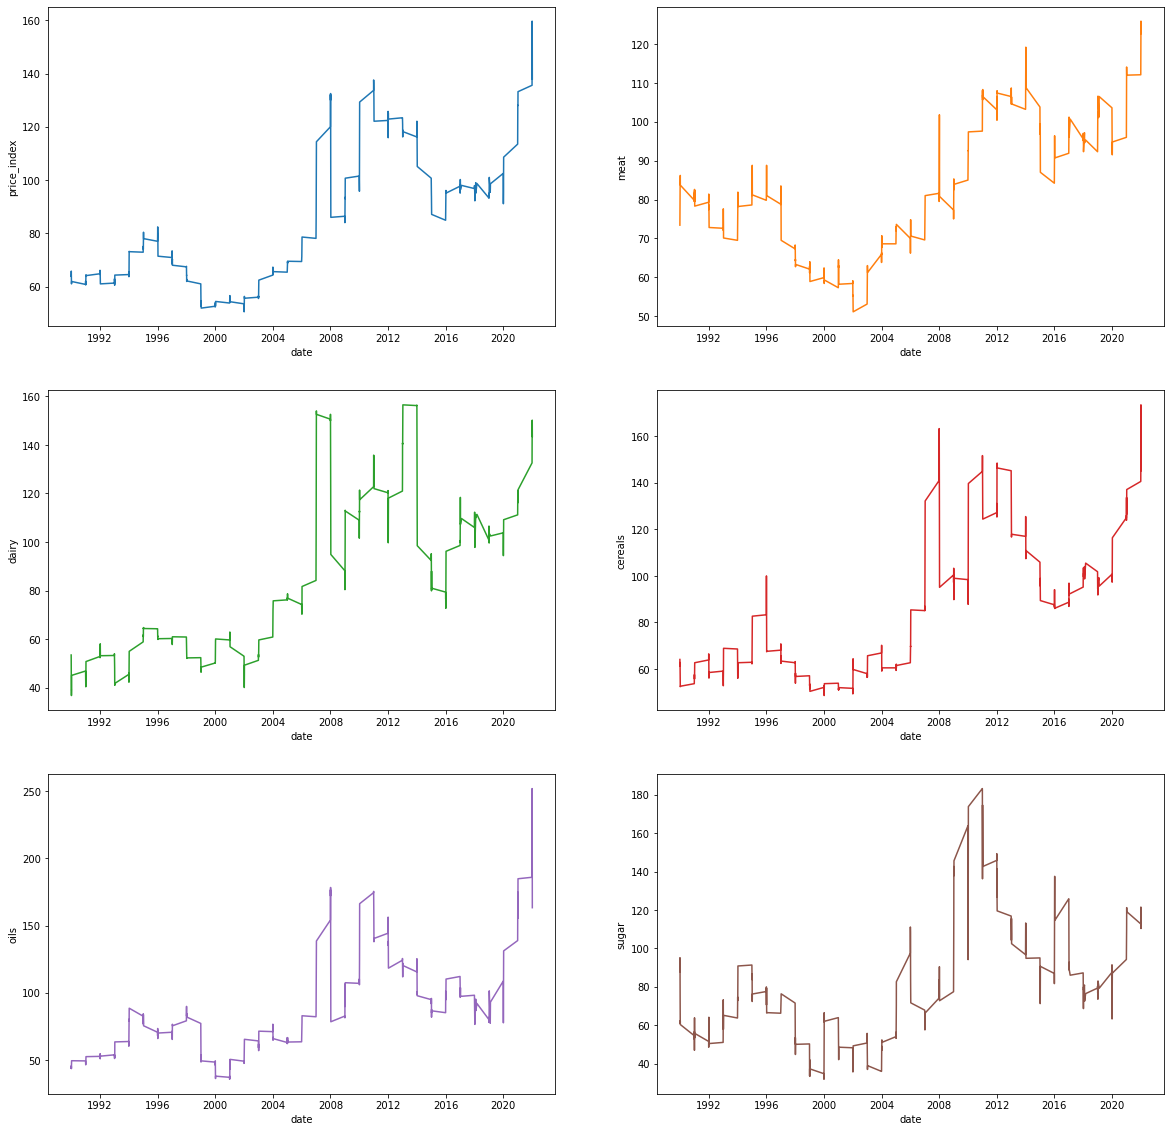

In [59]:
# Plotting data over time (daywise)
columns = ["price_index","meat","dairy","cereals","oils","sugar"]
col_index = 0
fig, ax = plt.subplots(3,2,figsize = (20,20))
# set palette 
palette = itertools.cycle(sns.color_palette())

for i in range(0,3):
    for j in range(0,2):
        sns.lineplot(ax = ax[i][j],data =df_food, x="date", y=columns[col_index],color=next(palette))
        col_index += 1


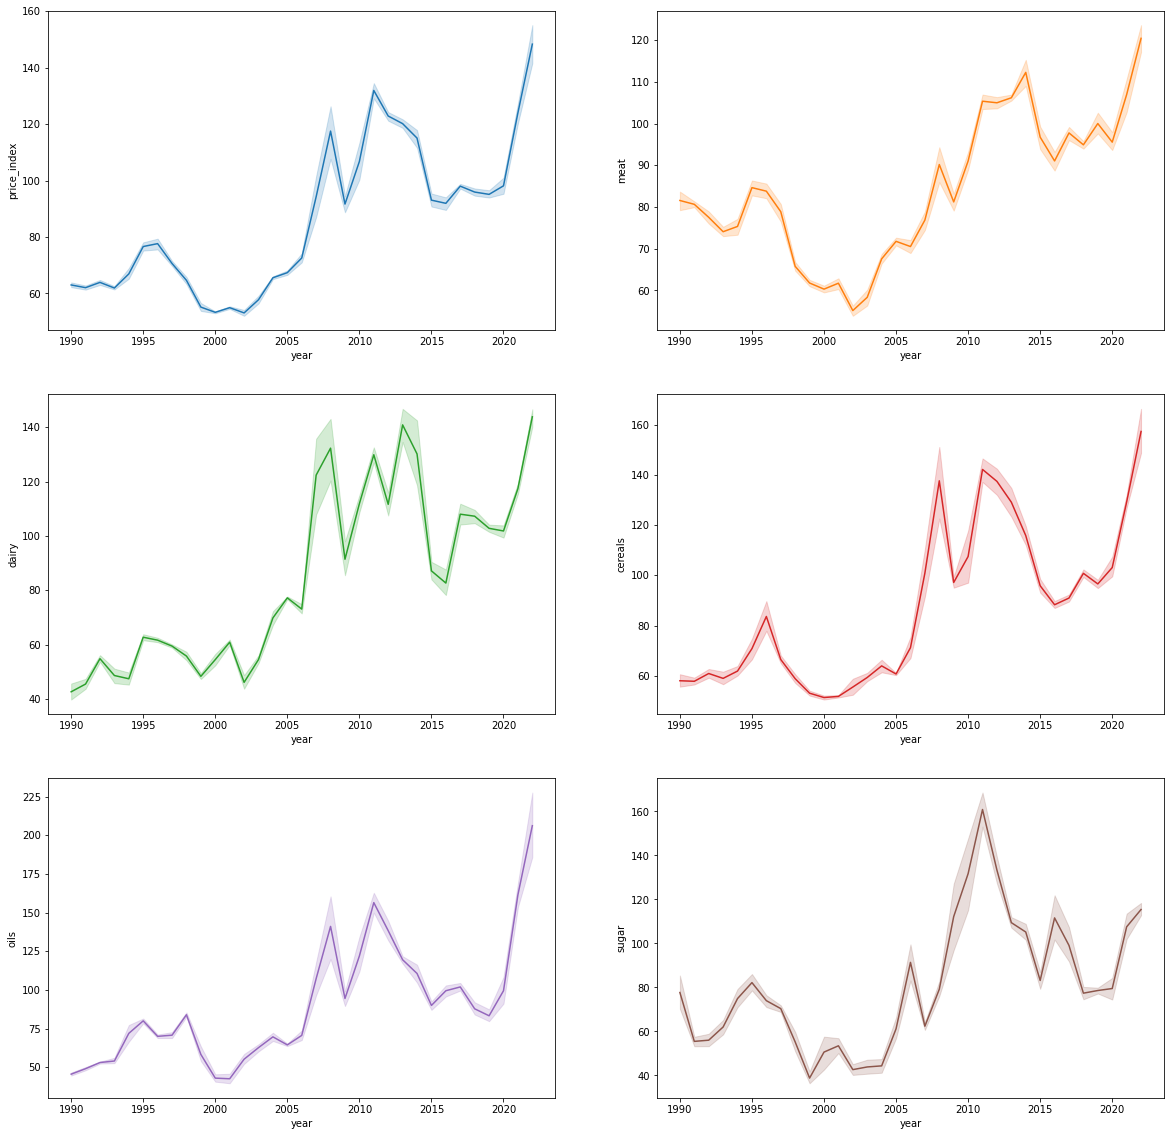

In [107]:
# Plotting data over time (yearwise)
columns = ["price_index","meat","dairy","cereals","oils","sugar"]
col_index = 0
fig, ax = plt.subplots(3,2,figsize = (20,20))
# set palette 
palette = itertools.cycle(sns.color_palette())

for i in range(0,3):
    for j in range(0,2):
        sns.lineplot(ax = ax[i][j],data =df_food, x="year", y=columns[col_index],color=next(palette))
        col_index += 1

<AxesSubplot:>

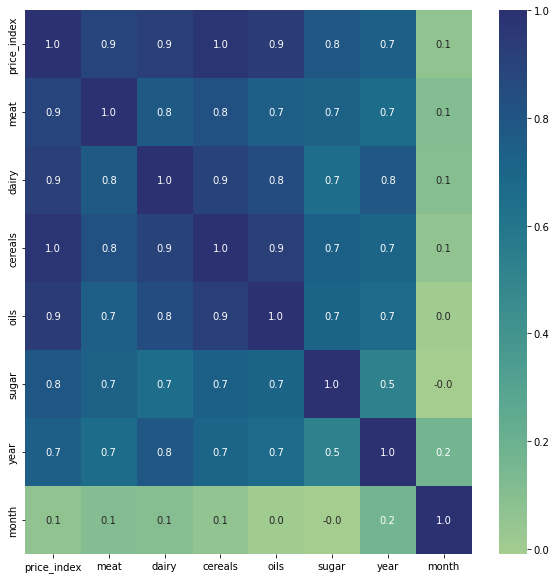

In [69]:
#correlation between foods
plt.figure(figsize=(10,10))
sns.heatmap(df_food.corr(), annot=True,fmt=".1f",cmap="crest")

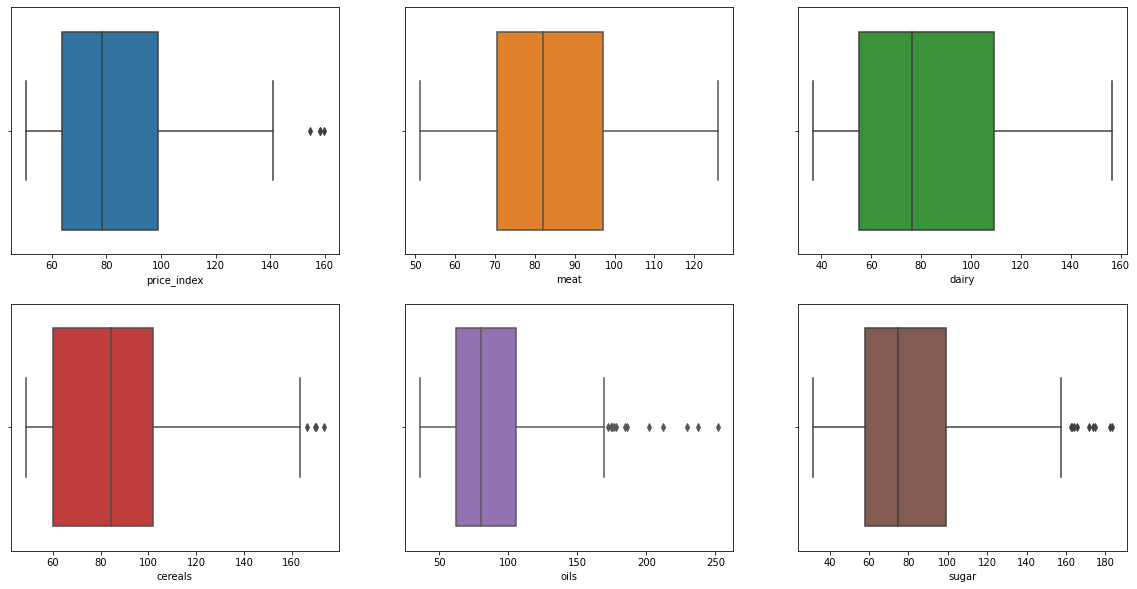

In [85]:
#outlier detection
columns = ["price_index","meat","dairy","cereals","oils","sugar"]
col_index = 0
fig, ax = plt.subplots(2,3,figsize = (20,10))
# set palette 
palette = itertools.cycle(sns.color_palette())

for i in range(0,2):
    for j in range(0,3):
        sns.boxplot(ax = ax[i][j],data =df_food,x=columns[col_index],color=next(palette))
        col_index += 1

In [105]:
#Generate Grouping for month_year
df_food_month_year = df_food.groupby(by="year").mean()

In [106]:
df_food_month_year[columns].pct_change().style.highlight_max(color="lightgreen").highlight_min(color="yellow").format("{:.2%}",na_rep="-")

,price_index,meat,dairy,cereals,oils,sugar
year,,,,,,
1990,-,-,-,-,-,-
1991,-1.52%,-1.12%,6.69%,-0.37%,7.78%,-28.59%
1992,3.01%,-3.87%,20.53%,5.34%,8.13%,0.98%
1993,-3.12%,-4.45%,-11.30%,-3.17%,1.84%,10.71%
1994,8.07%,1.71%,-2.47%,4.93%,33.17%,20.84%
1995,14.48%,12.35%,32.27%,14.40%,11.26%,9.67%
1996,1.34%,-1.00%,-1.73%,18.07%,-12.54%,-9.99%
1997,-9.06%,-5.88%,-3.54%,-20.47%,1.07%,-4.89%
1998,-8.45%,-16.60%,-6.18%,-11.46%,18.68%,-21.53%


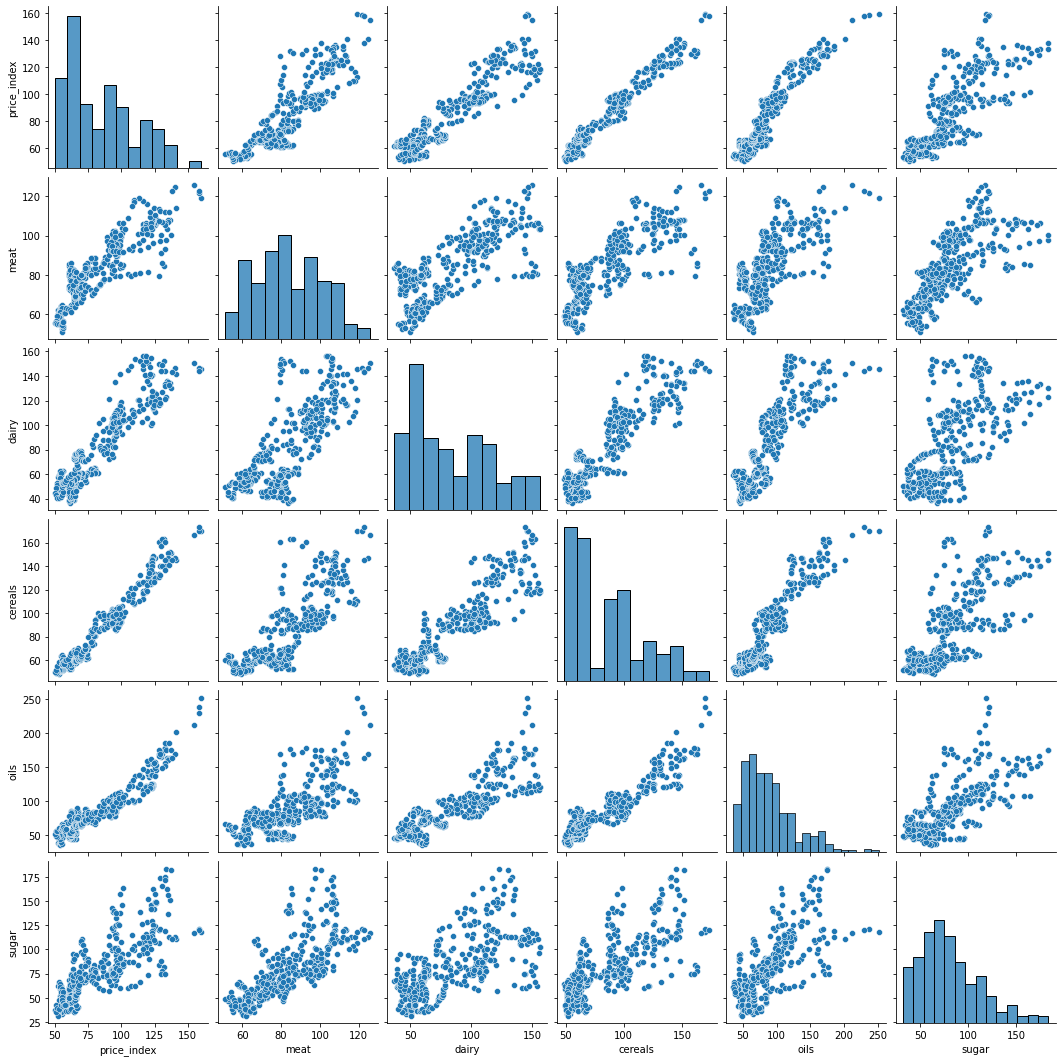

In [114]:
columns = ["price_index","meat","dairy","cereals","oils","sugar"]
sns.pairplot(df_food[columns])